# Bean Leaf Lesions Classification

### Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import random
import warnings
from mpl_toolkits.axes_grid1 import ImageGrid
warnings.simplefilter('ignore')

### Data Preprocesing

In [2]:
angular_leaf_spot = r'C:/Users/PC/Desktop/ML/Data/leef/train/angular_leaf_spot'
bean_rust = r'C:/Users/PC/Desktop/ML/Data/leef/train/bean_rust'
healthy = r'C:/Users/PC/Desktop/ML/Data/leef/train/healthy'

In [3]:
def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    
            lower_green = np.array([40, 40, 40])  
            upper_green = np.array([80, 255, 255])
            
            non_green_mask = cv2.inRange(hsv, lower_green, upper_green)
            non_green_region = cv2.bitwise_and(imagen, imagen, mask=non_green_mask)
            black_image = np.zeros_like(imagen)
            black_image[non_green_mask != 0] = imagen[non_green_mask != 0]
            
            datos.append(black_image)
            
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

In [4]:
df_angular_leaf_spot, etiquetas_angular_leaf_spot = cargar_datos(angular_leaf_spot, etiqueta=2, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
df_angular_bean_rust, etiquetas_bean_rust = cargar_datos(bean_rust, etiqueta=1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
df_angular_healthy, etiquetas_healthy = cargar_datos(healthy, etiqueta=0, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

In [5]:
df = df_angular_leaf_spot + df_angular_bean_rust + df_angular_healthy
etiquetas = etiquetas_angular_leaf_spot + etiquetas_bean_rust + etiquetas_healthy

In [6]:
X = np.array(df)
Y = np.array(etiquetas)

In [7]:
print(X.shape, Y.shape)

(1033, 100, 100, 3) (1033,)


In [8]:
pd.Series(Y).value_counts()

1    348
2    345
0    340
dtype: int64

### Exploratory Data Analysis

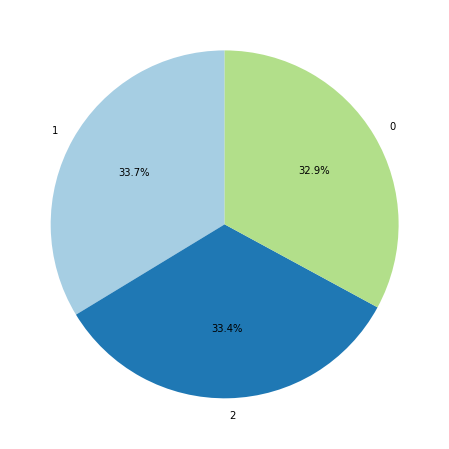

In [9]:
serie_etiquetas = pd.Series(Y)

conteo_etiquetas = serie_etiquetas.value_counts()
plt.figure(figsize = (10,8))
plt.pie(conteo_etiquetas, labels=conteo_etiquetas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

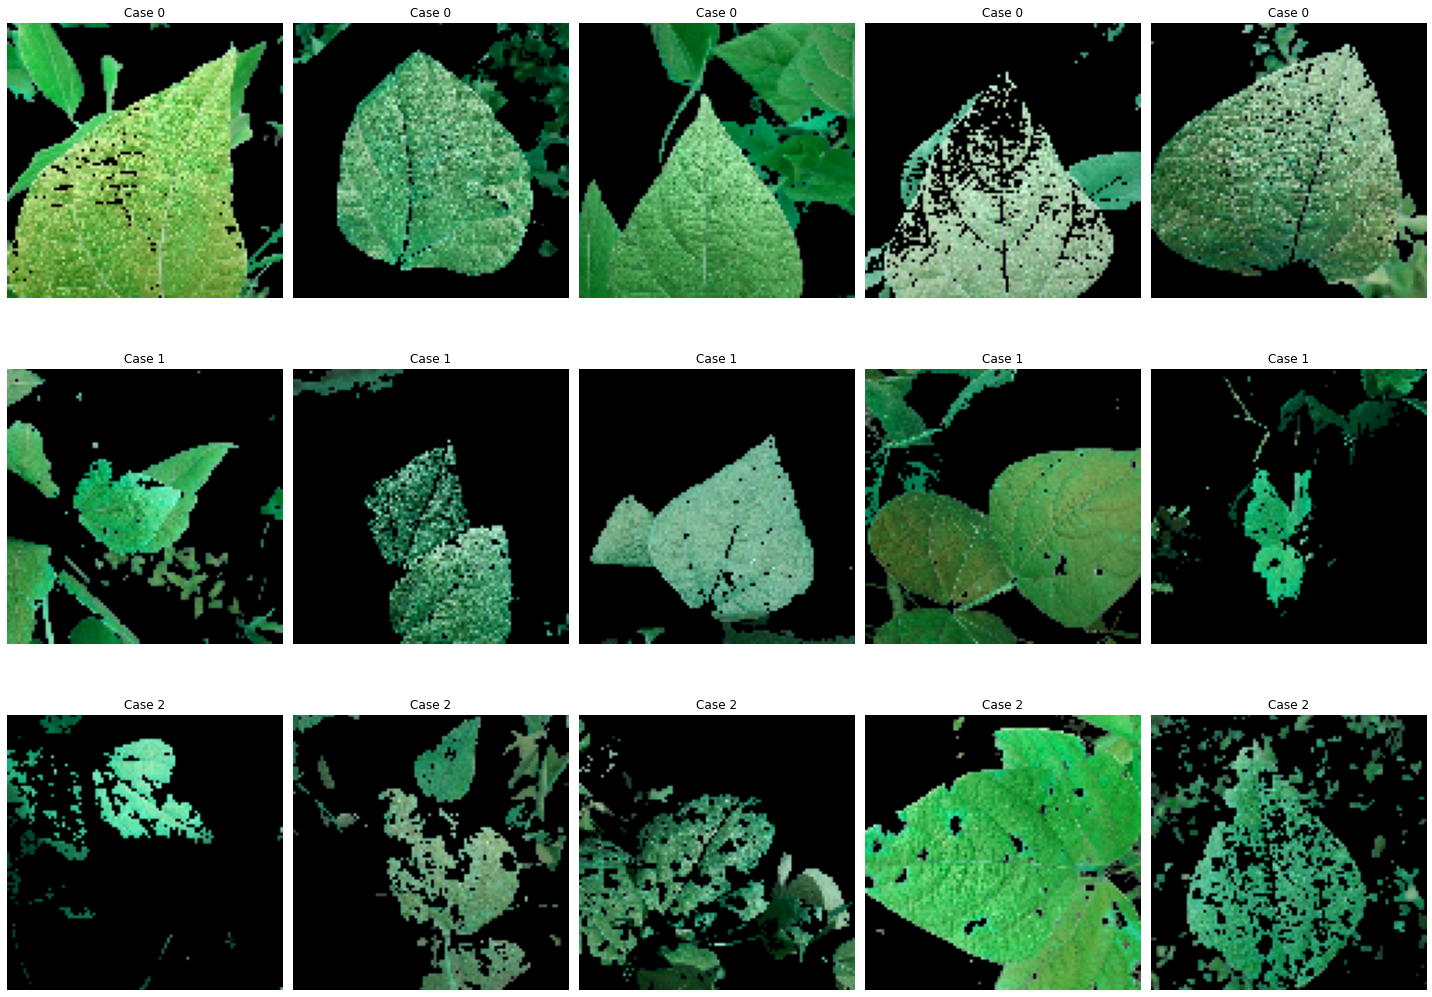

In [10]:
X = np.array(df)
Y = np.array(etiquetas)

fig, axs = plt.subplots(3, 5, figsize=(20, 15))

for etiqueta in range(5):
    imagenes_etiqueta = [X[i] for i in range(len(Y)) if Y[i] == etiqueta]
    etiquetas_etiqueta = [Y[i] for i in range(len(Y)) if Y[i] == etiqueta]

    for i in range(min(5, len(imagenes_etiqueta))):
        row = etiqueta
        col = i
        axs[row, col].imshow(imagenes_etiqueta[i], cmap='viridis')
        axs[row, col].set_title(f'Case {etiquetas_etiqueta[i]}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Modeling and Evaluation

In [11]:
X = np.array(df)
X = X.reshape(X.shape[0], -1)
Y = etiquetas

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Logistic Regression

In [14]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.52      0.68      0.59        80
           1       0.46      0.43      0.44        89
           2       0.49      0.40      0.44        90

    accuracy                           0.49       259
   macro avg       0.49      0.50      0.49       259
weighted avg       0.49      0.49      0.49       259

accuracy:  0.4942084942084942
mean_absolute_error:  0.640926640926641
mean_squared_error:  0.9111969111969112


### Random Forest Classifier

In [15]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.63      0.82      0.72        80
           1       0.65      0.61      0.63        89
           2       0.64      0.51      0.57        90

    accuracy                           0.64       259
   macro avg       0.64      0.65      0.64       259
weighted avg       0.64      0.64      0.63       259

accuracy:  0.640926640926641
mean_absolute_error:  0.47104247104247104
mean_squared_error:  0.694980694980695


### Decision Tree Classifier

In [16]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.49      0.57      0.53        80
           1       0.47      0.40      0.44        89
           2       0.49      0.49      0.49        90

    accuracy                           0.49       259
   macro avg       0.49      0.49      0.49       259
weighted avg       0.49      0.49      0.48       259

accuracy:  0.4864864864864865
mean_absolute_error:  0.667953667953668
mean_squared_error:  0.9768339768339769


### KNeighborsClassifier

In [17]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        80
           1       0.42      0.42      0.42        89
           2       0.47      0.50      0.49        90

    accuracy                           0.51       259
   macro avg       0.52      0.52      0.52       259
weighted avg       0.52      0.51      0.51       259

accuracy:  0.5135135135135135
mean_absolute_error:  0.5752895752895753
mean_squared_error:  0.752895752895753


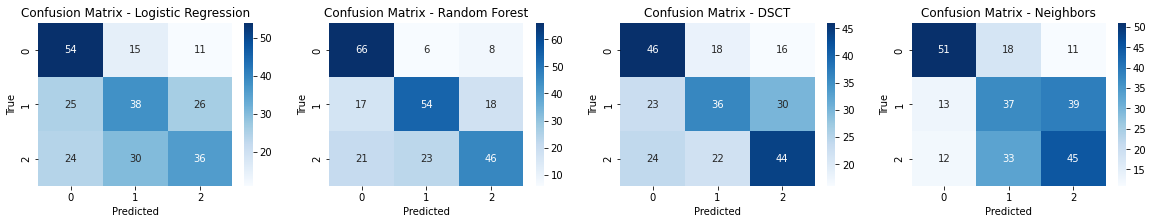

In [18]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')


sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.show()

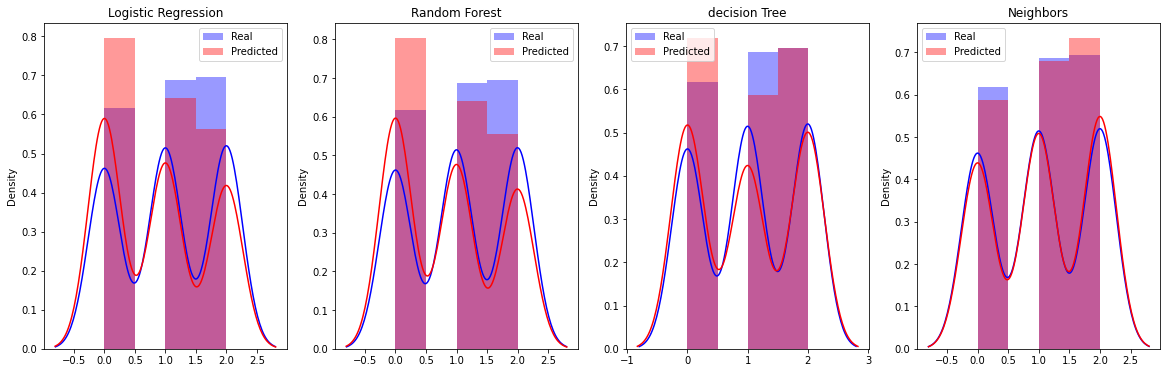

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Blue')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Blue')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Blue')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Blue')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

### RN - Keras

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   
    layers.Dense(128, activation='relu'),    
    layers.Dropout(0.2),                     
    layers.Dense(10, activation='softmax')   
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\naccuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2954 - accuracy: 0.9129 - val_loss: 0.1432 - val_accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1451 - accuracy: 0.9574 - val_loss: 0.1029 - val_accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1061 - accuracy: 0.9679 - val_loss: 0.0875 - val_accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0786 - val_accuracy: 0.9749
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9735

accuracy: 0.9735000133514404


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0705 - val_accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0582 - accuracy: 0.9809 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0525 - accuracy: 0.9829 - val_loss: 0.0686 - val_accuracy: 0.9803
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0475 - accuracy: 0.9844 - val_loss: 0.0759 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - accuracy: 0.9849 - val_loss: 0.0716 - val_accuracy: 0.9794


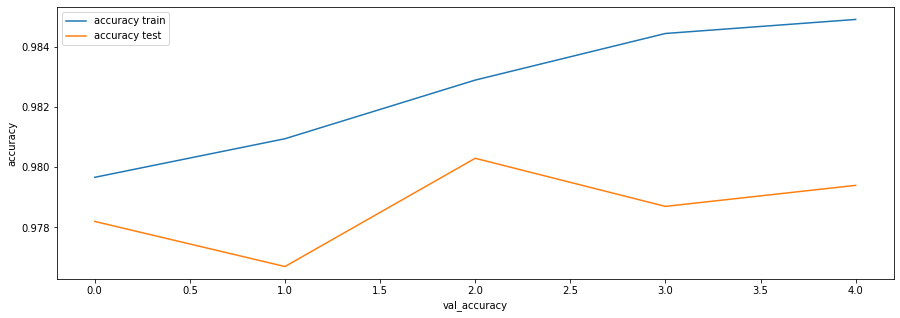

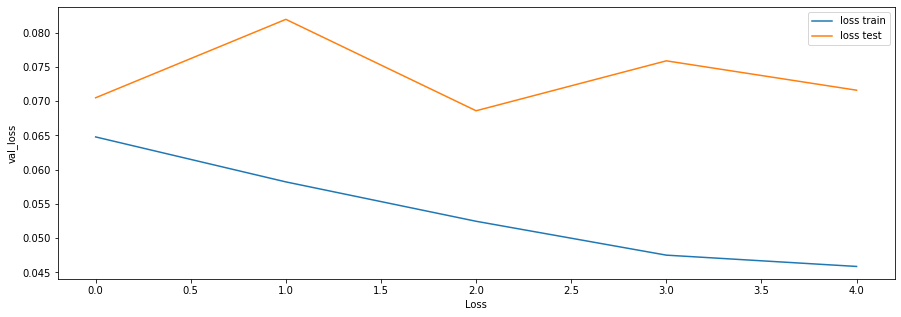

In [21]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'], label='accuracy train')
plt.plot(history.history['val_accuracy'], label='accuracy test')
plt.xlabel('val_accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.xlabel('Loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()